**Introduction:**
Objective and Use Case

The primary objective of this project is to analyze customer data to understand spending behaviors and patterns. The insights derived from this analysis can be used for targeted marketing strategies, improving customer experience, and enhancing business decisions. The use case includes identifying key customer segments and understanding their purchasing behavior.

Overview of the Dataset

The dataset contains the following features:

    Customer ID: Unique identifier for each customer
    Gender: Gender of the customer (Male/Female)
    Age: Age of the customer
    Annual Income: Annual income of the customer in dollars
    Spending Score: Score assigned by the company based on customer behavior and spending nature

# Loading of Dataset

In [45]:

import pandas as pd
data = pd.read_csv('/content/Mall_Customers.csv')



# Brief Overview of the Dataset

In [46]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [47]:
print(data.head(15))

    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0            1    Male   19                  15                      39
1            2    Male   21                  15                      81
2            3  Female   20                  16                       6
3            4  Female   23                  16                      77
4            5  Female   31                  17                      40
5            6  Female   22                  17                      76
6            7  Female   35                  18                       6
7            8  Female   23                  18                      94
8            9    Male   64                  19                       3
9           10  Female   30                  19                      72
10          11    Male   67                  19                      14
11          12  Female   35                  19                      99
12          13  Female   58                  20                 

# EDA

In [48]:
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [49]:
# Naming columns correctly
data.rename(columns={'Genre':'Gender'},inplace='True')

In [50]:
# Check for missing values
print(data.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [51]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


# Grouping Spending Score by Gender

In [52]:
total_spending_by_gender = data.groupby('Gender')['Spending Score (1-100)'].sum()
print(total_spending_by_gender)

Gender
0    4269
1    5771
Name: Spending Score (1-100), dtype: int64


# Grouping Annual Income by Gender

In [53]:
total_annual_income_by_gender = data.groupby('Gender')['Annual Income (k$)'].sum()
print(total_annual_income_by_gender)

Gender
0    5476
1    6636
Name: Annual Income (k$), dtype: int64


# Data Visualisation
Visualize the results using Matplotlib to gain actionable insights.

1.   Distribution of Age


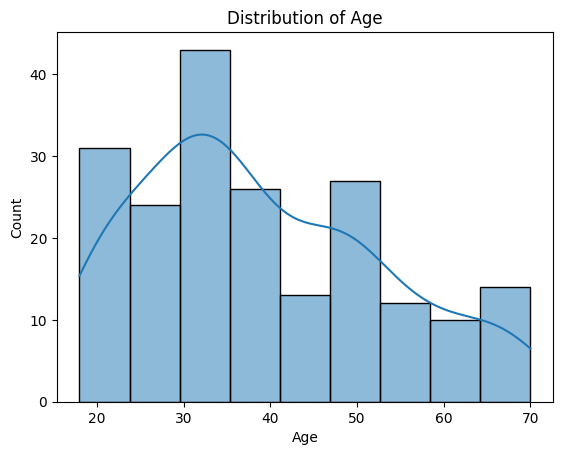

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Age
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()


2. Distribution of Annual Income

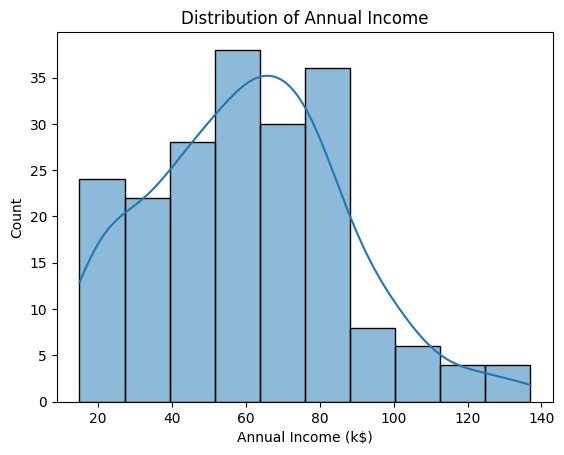

In [55]:
# Distribution of Annual Income
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income')
plt.show()


3. Distribution of Spending Score

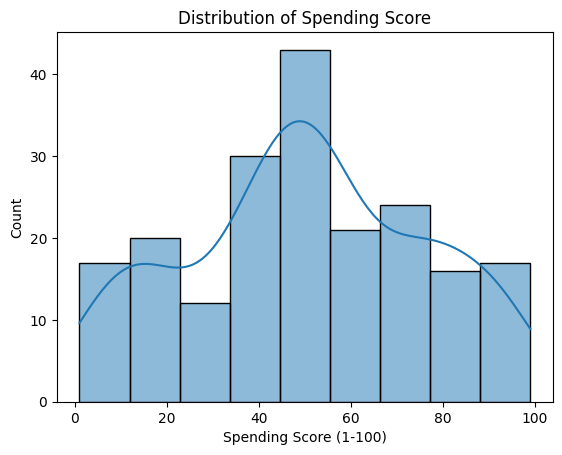

In [56]:
# Distribution of Spending Score
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score')
plt.show()


4. Scatterplot of Age vs Spending Score(1-100)



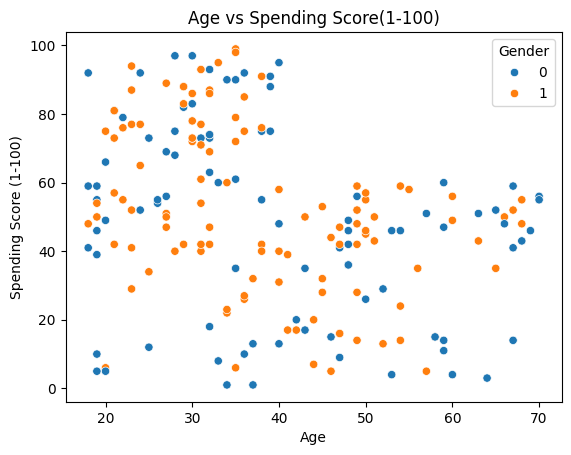

In [57]:
# Scatter plot of Age vs Spending Score
sns.scatterplot(data=data, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.title('Age vs Spending Score(1-100)')
plt.show()


5. Scatterplot of Annual Income (k$) vs Spending Score (1-100)

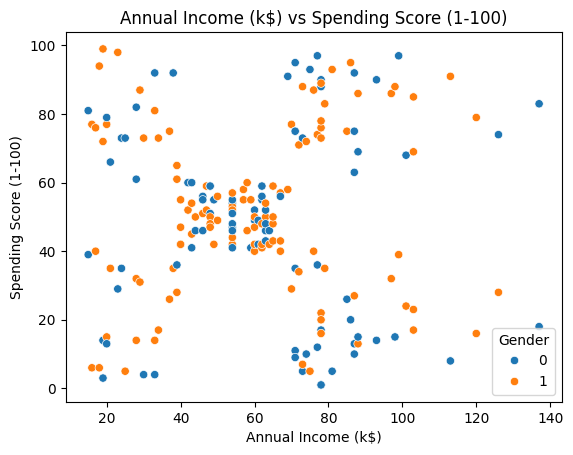

In [58]:
# Scatter plot of Annual Income vs Spending Score
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.show()


6. Scatterplot of Age vs Spending Score

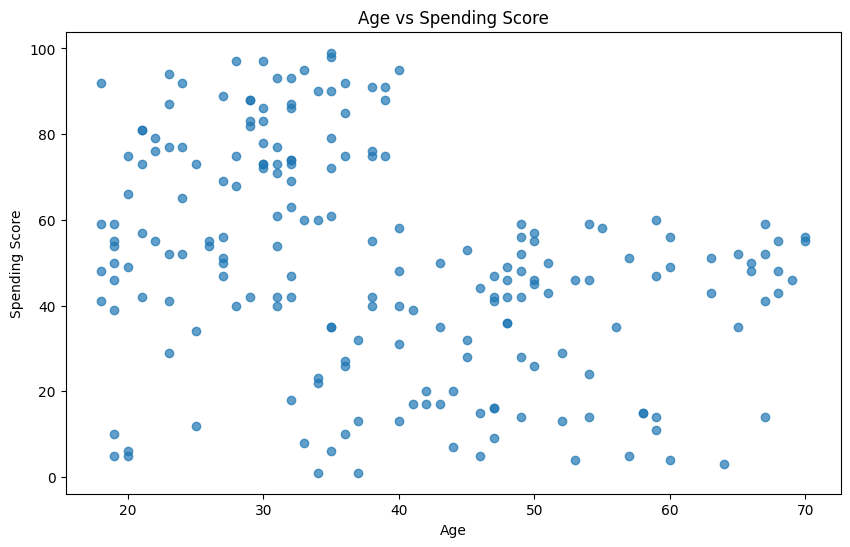

In [59]:
# Scatter plot of Age vs Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Spending Score (1-100)'], alpha=0.7)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()


7. Scatterplot of Annual Income vs Spending Score

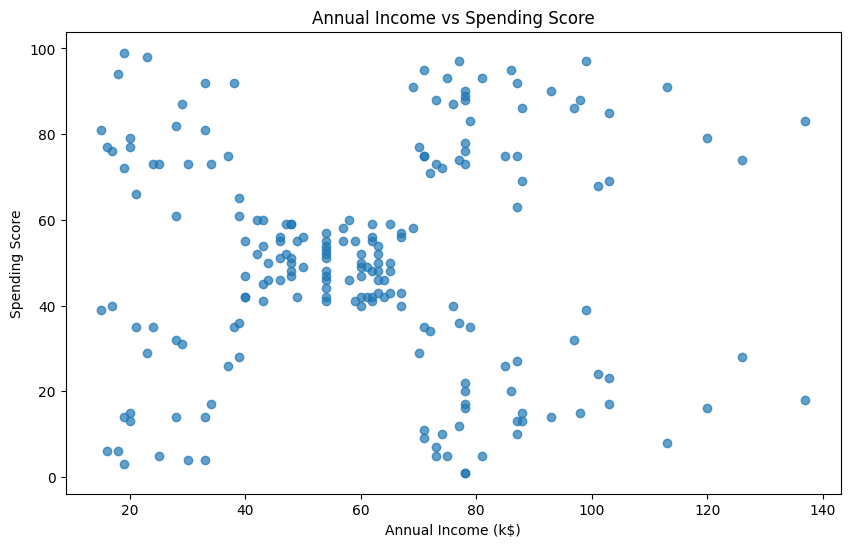

In [60]:
# Scatter plot of Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], alpha=0.7)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()


8. Bar Plot of Total Spending Scores by Gender

<ipython-input-62-5b8dd830fa29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_spending_by_gender.index, y=total_spending_by_gender.values, palette='viridis')


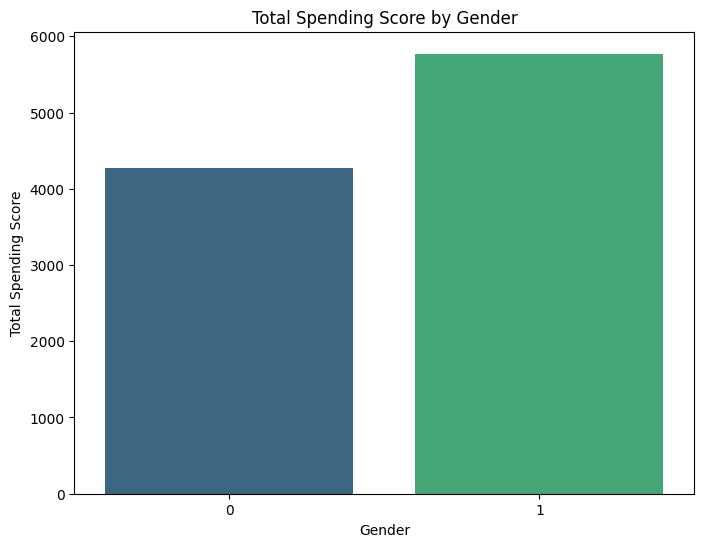

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of total spending scores by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=total_spending_by_gender.index, y=total_spending_by_gender.values, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Total Spending Score')
plt.title('Total Spending Score by Gender')
plt.show()


# Data Scaling with MinMaxScaler

In [63]:
import pandas as pd
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame (scaler.fit_transform(data), columns=data.columns)
print(df_scaled)

     CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0      0.000000     NaN  0.019231            0.000000                0.387755
1      0.005025     NaN  0.057692            0.000000                0.816327
2      0.010050     NaN  0.038462            0.008197                0.051020
3      0.015075     NaN  0.096154            0.008197                0.775510
4      0.020101     NaN  0.250000            0.016393                0.397959
..          ...     ...       ...                 ...                     ...
195    0.979899     NaN  0.326923            0.860656                0.795918
196    0.984925     NaN  0.519231            0.909836                0.275510
197    0.989950     NaN  0.269231            0.909836                0.744898
198    0.994975     NaN  0.269231            1.000000                0.173469
199    1.000000     NaN  0.230769            1.000000                0.836735

[200 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


# Identifying and Removing Outliers:

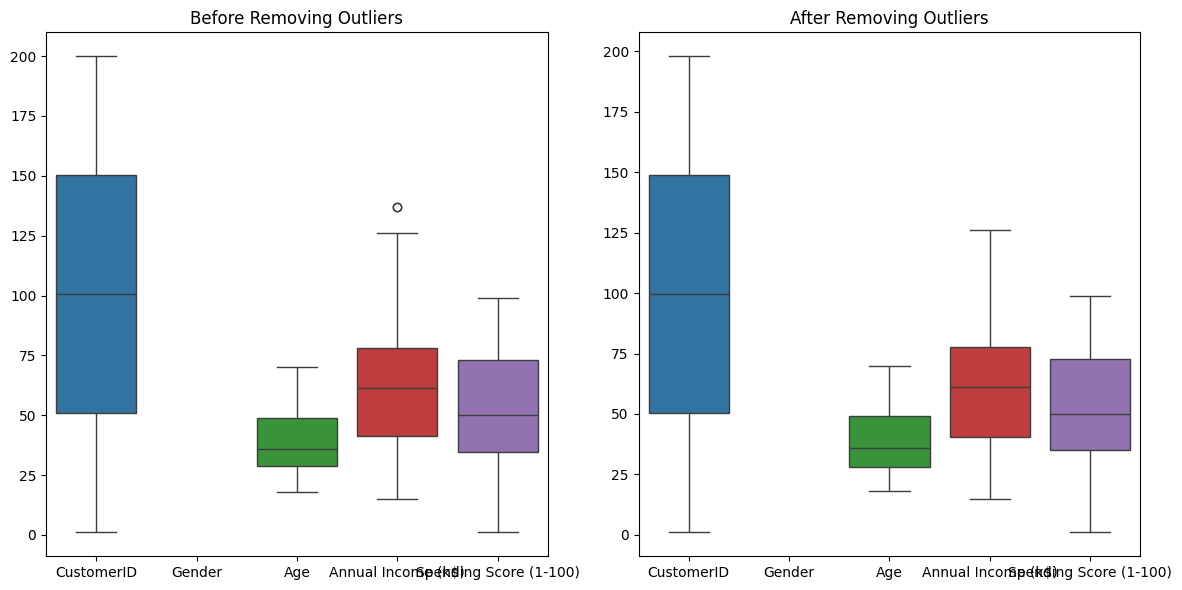

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data[numerical_cols])
plt.title('Before Removing Outliers')

df_clean = data[~((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean[numerical_cols])
plt.title('After Removing Outliers')

plt.tight_layout()
plt.show()




# K-means clustering
Applying K-Means Clustering to segment customers into distinct groups.

In [65]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans.fit(X)
data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


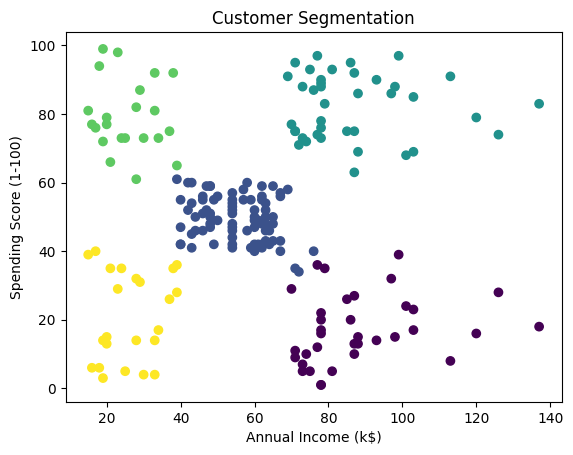

In [66]:
import matplotlib.pyplot as plt
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()